<a href="https://colab.research.google.com/github/michael96247/CSE144-Applied-Machine-Learning-Homework/blob/main/CSE_144_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

# Assignment 1

**DUE: Sunday October 9th at 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [2]:
NAME = "Michael Chen"
STUDENT_ID = "1772059"

## Problem 1 -  Use of List Comprehensions

### a) Use list comprehensions to create a list of all the indices of the 2's in the *number_list* you randomly generate (numbers between 1 and 10). (1 point)

In [3]:
from numpy.random import randint, seed

# Set the seed so the same random numbers will be generated.
seed(42)   # DON'T CHANGE

### YOUR CODE HERE ###
# number_list = randint(1, 10)
# for _ in range(20): print(randint(1, 7) + randint(1, 7))

number_list = [i for i, j in enumerate( [randint(1,11) for i in range(100)] ) if j == 2]
number_list

[16, 19, 38, 41, 46, 53, 56, 62, 64, 72]

### b) Generate a list of the sum of the numbers that come up when a pair of dice is cast 22 times. Find the mean and standard deviation of these numbers. (3 points)

In [4]:
from numpy import mean, std

seed(117)   # DON'T CHANGE

### YOUR CODE HERE ###
sums = [randint(1, 7) + randint(1, 7) for _ in range(22)]
print('mean =', mean(sums), '    std =', std(sums))


mean = 6.681818181818182     std = 2.669463065459277


### c) Generate a list of the sum of the numbers that come up when a pair of dice is cast 100000 times. Find the mean and standard deviation of these numbers. (3 points)

In [5]:
seed(111)   # DON'T CHANGE

### YOUR CODE HERE ###
sums = 12
sums = [randint(1, 7) + randint(1, 7) for _ in range(100000)]
print('mean =', mean(sums), '    std =', std(sums))

mean = 7.02026     std = 2.4131285776767055


### d) Write down your conclusion from the observations you made in this question. (6 points)

[YOUR ANSWER HERE]
As the number of the cast increase, the mean would be closer to the expected value. The expected value is (1/6 + 2/6 + 3/6 + 4/6 + 5/6 + 6/6) * 2 = 3.5 * 2 = 7. Also, as the number of the cast increase, the standard deviation will be smaller.

## Problem 2 - Data Processing on Heart Disease Data

When a data scientist first encounters a new dataset, the first step is data exploration. The dataset we will be using is derived from the Heart database from the UCI Machine Learning Repository.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### a) Read in the Data (2 points)
We are showing you a way to load data into your Colab file! Just run the next couple of code blocks. You'll have to paste your authorization code at one point...


In [7]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [9]:
downloaded = drive.CreateFile({'id':"1qF_Ees7ETr5BiPnHTabyeIH1KQVkViUK"})   # Replace the id with id of file you want to access
downloaded.GetContentFile('Heart.csv')        # Replace the file name with your file

# Finally we can actually read in the data.
data = pd.read_csv('Heart.csv')

# How many rows and columns are in this dataset?
data.info()

### YOUR CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


Number of rows: 306
Number of columns: 15

### b) Using Dataframe functionalities, provide a brief description of the data. The description can include (but not limited to): number of features, data type of each feature, statistics on numerical features, potential data cleaning tasks that needs to be done based on the data. (8 points)  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f3ba65160>,
      dtype=object)

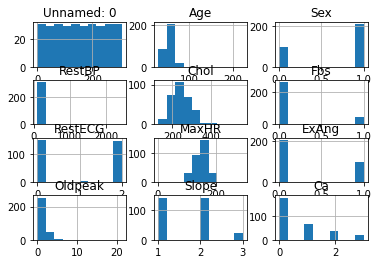

In [10]:
### YOUR CODE HERE ###
data.hist()

[YOUR ANSWER HERE]
There are 15 features as there are 15 columns, in which the first column is called (unnamed: 0), but I am not sure if it is useful. There are 306 rows, but two columns (Ca, Thal) contain some null values, rows with null values would be cleaned. Most data has either int or float type, except three columns (ChestPain, Thal, AHD). The three columns would be needed to convert into numerical values and one-hot encoding could be useful. For statistics on the numerical features, there seem to be outliers in age, which potentially could be error data. RestBP, Chol, MaxXR, and Oldpeak also seem to have outliers that are needed to be cleaned.

### c) Understanding the Data (12 points)

Look for a data description file whenever you explore a new dataset. This is a codebook (or text file) that tells you what each data item represents. The following link includes the data dictionary for this dataset: [Data Codebook](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [11]:
# Show the first few rows of the data.
### YOUR CODE HERE ###
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [12]:
# Print out the "info" of the dataset.
### YOUR CODE HERE ###
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  306 non-null    int64  
 1   Age         306 non-null    int64  
 2   Sex         306 non-null    int64  
 3   ChestPain   306 non-null    object 
 4   RestBP      306 non-null    int64  
 5   Chol        306 non-null    int64  
 6   Fbs         306 non-null    int64  
 7   RestECG     306 non-null    int64  
 8   MaxHR       306 non-null    int64  
 9   ExAng       306 non-null    int64  
 10  Oldpeak     306 non-null    float64
 11  Slope       306 non-null    int64  
 12  Ca          302 non-null    float64
 13  Thal        304 non-null    object 
 14  AHD         306 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 36.0+ KB


The above output can help you to see how much missing data is in the dataset. How many null values (missing values) exists in the data?

[YOUR ANSWER HERE]
There are 4 null values in Ca and 2 null values in Thal.

What to do about missing values is very good question. Sometimes one replaces such missing values with the mean of all the values that are present for this variable. But to keep things simple here we will simply delete any rows with missing data.

Use the code cell below to drop null values from the data. [hint: you can use dropna() function]

In [13]:
# Drop any rows with missing data
indexes= data[ data['Ca'].isnull()].index
data.drop(indexes, inplace=True)
indexes= data[ data['Thal'].isnull()].index
data.drop(indexes, inplace=True)
### YOUR CODE HERE ###


Another useful Pandas dataframe method is describe(). The describe method gives summary statistics for each column, which can help you to identify outliers.

In [14]:
# The describe method of a Pandas dataframe yields much useful information.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,152.216667,55.036667,0.676667,139.423333,247.073333,0.143333,0.993333,150.076667,0.326667,1.130333,1.610000,0.670000
std,88.235071,13.237299,0.468530,134.670429,52.367188,0.350998,0.994948,27.094362,0.469778,1.645887,0.621171,0.936674
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,75.750000,47.750000,0.000000,120.000000,211.000000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000
50%,151.500000,56.000000,1.000000,130.000000,242.500000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,228.250000,61.000000,1.000000,140.000000,276.250000,0.000000,2.000000,166.250000,1.000000,1.800000,2.000000,1.000000
max,306.000000,222.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000


Outliers are values far from the other data values (the distribution of the data), and are usually typos or other errors (such as measurement error). Looking at the data description above, do you spot any possible outliers in the data?

[YOUR ANSWER HERE]
Yes, there seem to be outliers in columns age, RestBP, Chol, MaxHR, and Oldpeak.

### d) Outlier Detection \& Elimination (15 points)
In this section, We'll remove any ages that are more than 4 standard deviations from the mean.

To accomplish this: 

1) You'll make a new column called AgeZ to hold the z-transformed values of the Age column. 


2) Then, any AgeZ value that's less than -4 or more than 4 should be flagged as an outlier. 


3) Remove those entries from the dataset.

Remember that standardizing the data (or z-transform) is making your data have a zero mean and unit variance. This can be done with:

$$x \to_{stdize}  \frac{x - \mu}{\sigma}$$
Where $\mu$ is your mean and $\sigma$ is your standard deviation.


In [15]:
data['AgeZ'] = (data['Age'] - data['Age'].mean() ) / data['Age'].std()

### YOUR CODE HERE ###

# Delete any rows for which AgeZ is greater than 4 or less than -4.
indexes= data[ data['AgeZ'] > 4].index
data.drop(indexes, inplace=True)
indexes= data[ data['AgeZ'] < -4].index
data.drop(indexes, inplace=True)

# data =  ### YOUR CODE HERE ###

# Cleanup - delete the z-tranform column since we don't need it any more.
data.drop(columns = ['AgeZ']) ### YOUR CODE HERE ###

# Let's take another look using the describe function.
data.describe()
### YOUR CODE HERE ###

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AgeZ
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,151.705686,54.478261,0.675585,139.387960,247.424749,0.143813,0.996656,150.571906,0.324415,1.124749,1.605351,0.672241,-0.042184
std,87.937251,9.052904,0.468941,134.894801,52.099449,0.351488,0.994948,25.743782,0.468941,1.645797,0.616962,0.937438,0.683894
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,-1.966917
25%,75.500000,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,-0.569351
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.072774
75%,227.500000,61.000000,1.000000,140.000000,276.500000,0.000000,2.000000,166.500000,1.000000,1.700000,2.000000,1.000000,0.450495
max,306.000000,77.000000,1.000000,2444.000000,564.000000,1.000000,2.000000,293.000000,1.000000,21.200000,3.000000,3.000000,1.659201


Notice that now the Age column is much more reasonable. Report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 

[YOUR ANSWER HERE]

Before outlier removal:
Mean:55.04
Standard Deviation: 13.24
Q1: 47.75
Q2: 56.00
Q3: 61.00

After outlier removel:
Mean:54.48
Standard Deviation: 9.05
Q1: 47.50
Q2: 56.00
Q3: 61.00

Perform the same process to eliminate any extreme outliers (more than 4 standard deviations away from the mean) for RestBP, MaxHR, and the Oldpeak variables. Delete those exta columns after you have removed the outliers.

In [16]:
### YOUR CODE HERE ###
data['RestBPZ'] = (data['RestBP'] - data['RestBP'].mean() ) / data['RestBP'].std()
indexes= data[ data['RestBPZ'] > 4].index
data.drop(indexes, inplace=True)
indexes= data[ data['RestBPZ'] < -4].index
data.drop(indexes, inplace=True)
data.drop(columns = ['RestBPZ'])

data['MaxHRZ'] = (data['MaxHR'] - data['MaxHR'].mean() ) / data['MaxHR'].std()
indexes= data[ data['MaxHRZ'] > 4].index
data.drop(indexes, inplace=True)
indexes= data[ data['MaxHRZ'] < -4].index
data.drop(indexes, inplace=True)
data.drop(columns = ['MaxHRZ'])

data['OldpeakZ'] = (data['Oldpeak'] - data['Oldpeak'].mean() ) / data['Oldpeak'].std()
indexes= data[ data['OldpeakZ'] > 4].index
data.drop(indexes, inplace=True)
indexes= data[ data['OldpeakZ'] < -4].index
data.drop(indexes, inplace=True)
data.drop(columns = ['OldpeakZ'])


# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AgeZ,RestBPZ,MaxHRZ,OldpeakZ
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,151.294915,54.532203,0.681356,131.637288,247.728814,0.145763,0.996610,149.586441,0.328814,1.036271,1.596610,0.671186,-0.038109,-0.057457,-0.035090,-0.041870
std,87.248284,9.066167,0.466742,17.733303,51.919492,0.353468,0.994879,23.012681,0.470580,1.130351,0.614442,0.931507,0.684896,0.131460,0.893767,0.694772
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,-1.966917,-0.336469,-3.087231,-0.678816
25%,75.500000,48.000000,0.000000,120.000000,211.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,-0.531579,-0.143727,-0.679274,-0.678816
50%,151.000000,56.000000,1.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.072774,-0.069595,0.097486,-0.187095
75%,226.500000,61.000000,1.000000,140.000000,276.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,0.450495,0.004537,0.602380,0.304626
max,302.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,3.000000,3.000000,1.659201,0.449328,2.000549,2.763231


For the columns RestBP, MaxHR, and Oldpeak, report Mean, Standard Deviation, Q1, Q2, and Q3 of the age column before outlier removal and after outlier removal. 

[YOUR ANSWER HERE]
RestBP:

Before outlier removal:
Mean: 139.39
Standard Deviation: 134.89
Q1: 120.00
Q2: 130.00
Q3: 140.00

After outlier removel:
Mean: 131.64
Standard Deviation: 17.73
Q1: 120.00
Q2: 130.00
Q3: 140.00

MaxHR:

Before outlier removal:
Mean: 150.57
Standard Deviation: 25.74
Q1: 133.00
Q2: 153.00
Q3: 166.50

After outlier removel:
Mean: 149.59
Standard Deviation: 23.01
Q1: 133.00
Q2: 153.00
Q3: 166.00

Oldpeak:

Before outlier removal:
Mean: 1.12
Standard Deviation: 1.65
Q1: 0.00
Q2: 0.80
Q3: 1.70

After outlier removel:
Mean: 1.04
Standard Deviation: 1.13
Q1: 0.00
Q2: 0.80
Q3: 1.60


### e) Data Visualization (4 points)

Sometimes it is useful to look at a pairwise plot of all the variables. Below we do this for all but the first column. Be patient, this takes a minute to complete. Notice that the main diagonal has histogram plots for each variable, which gives you a sense of the distribution of values of each variable.

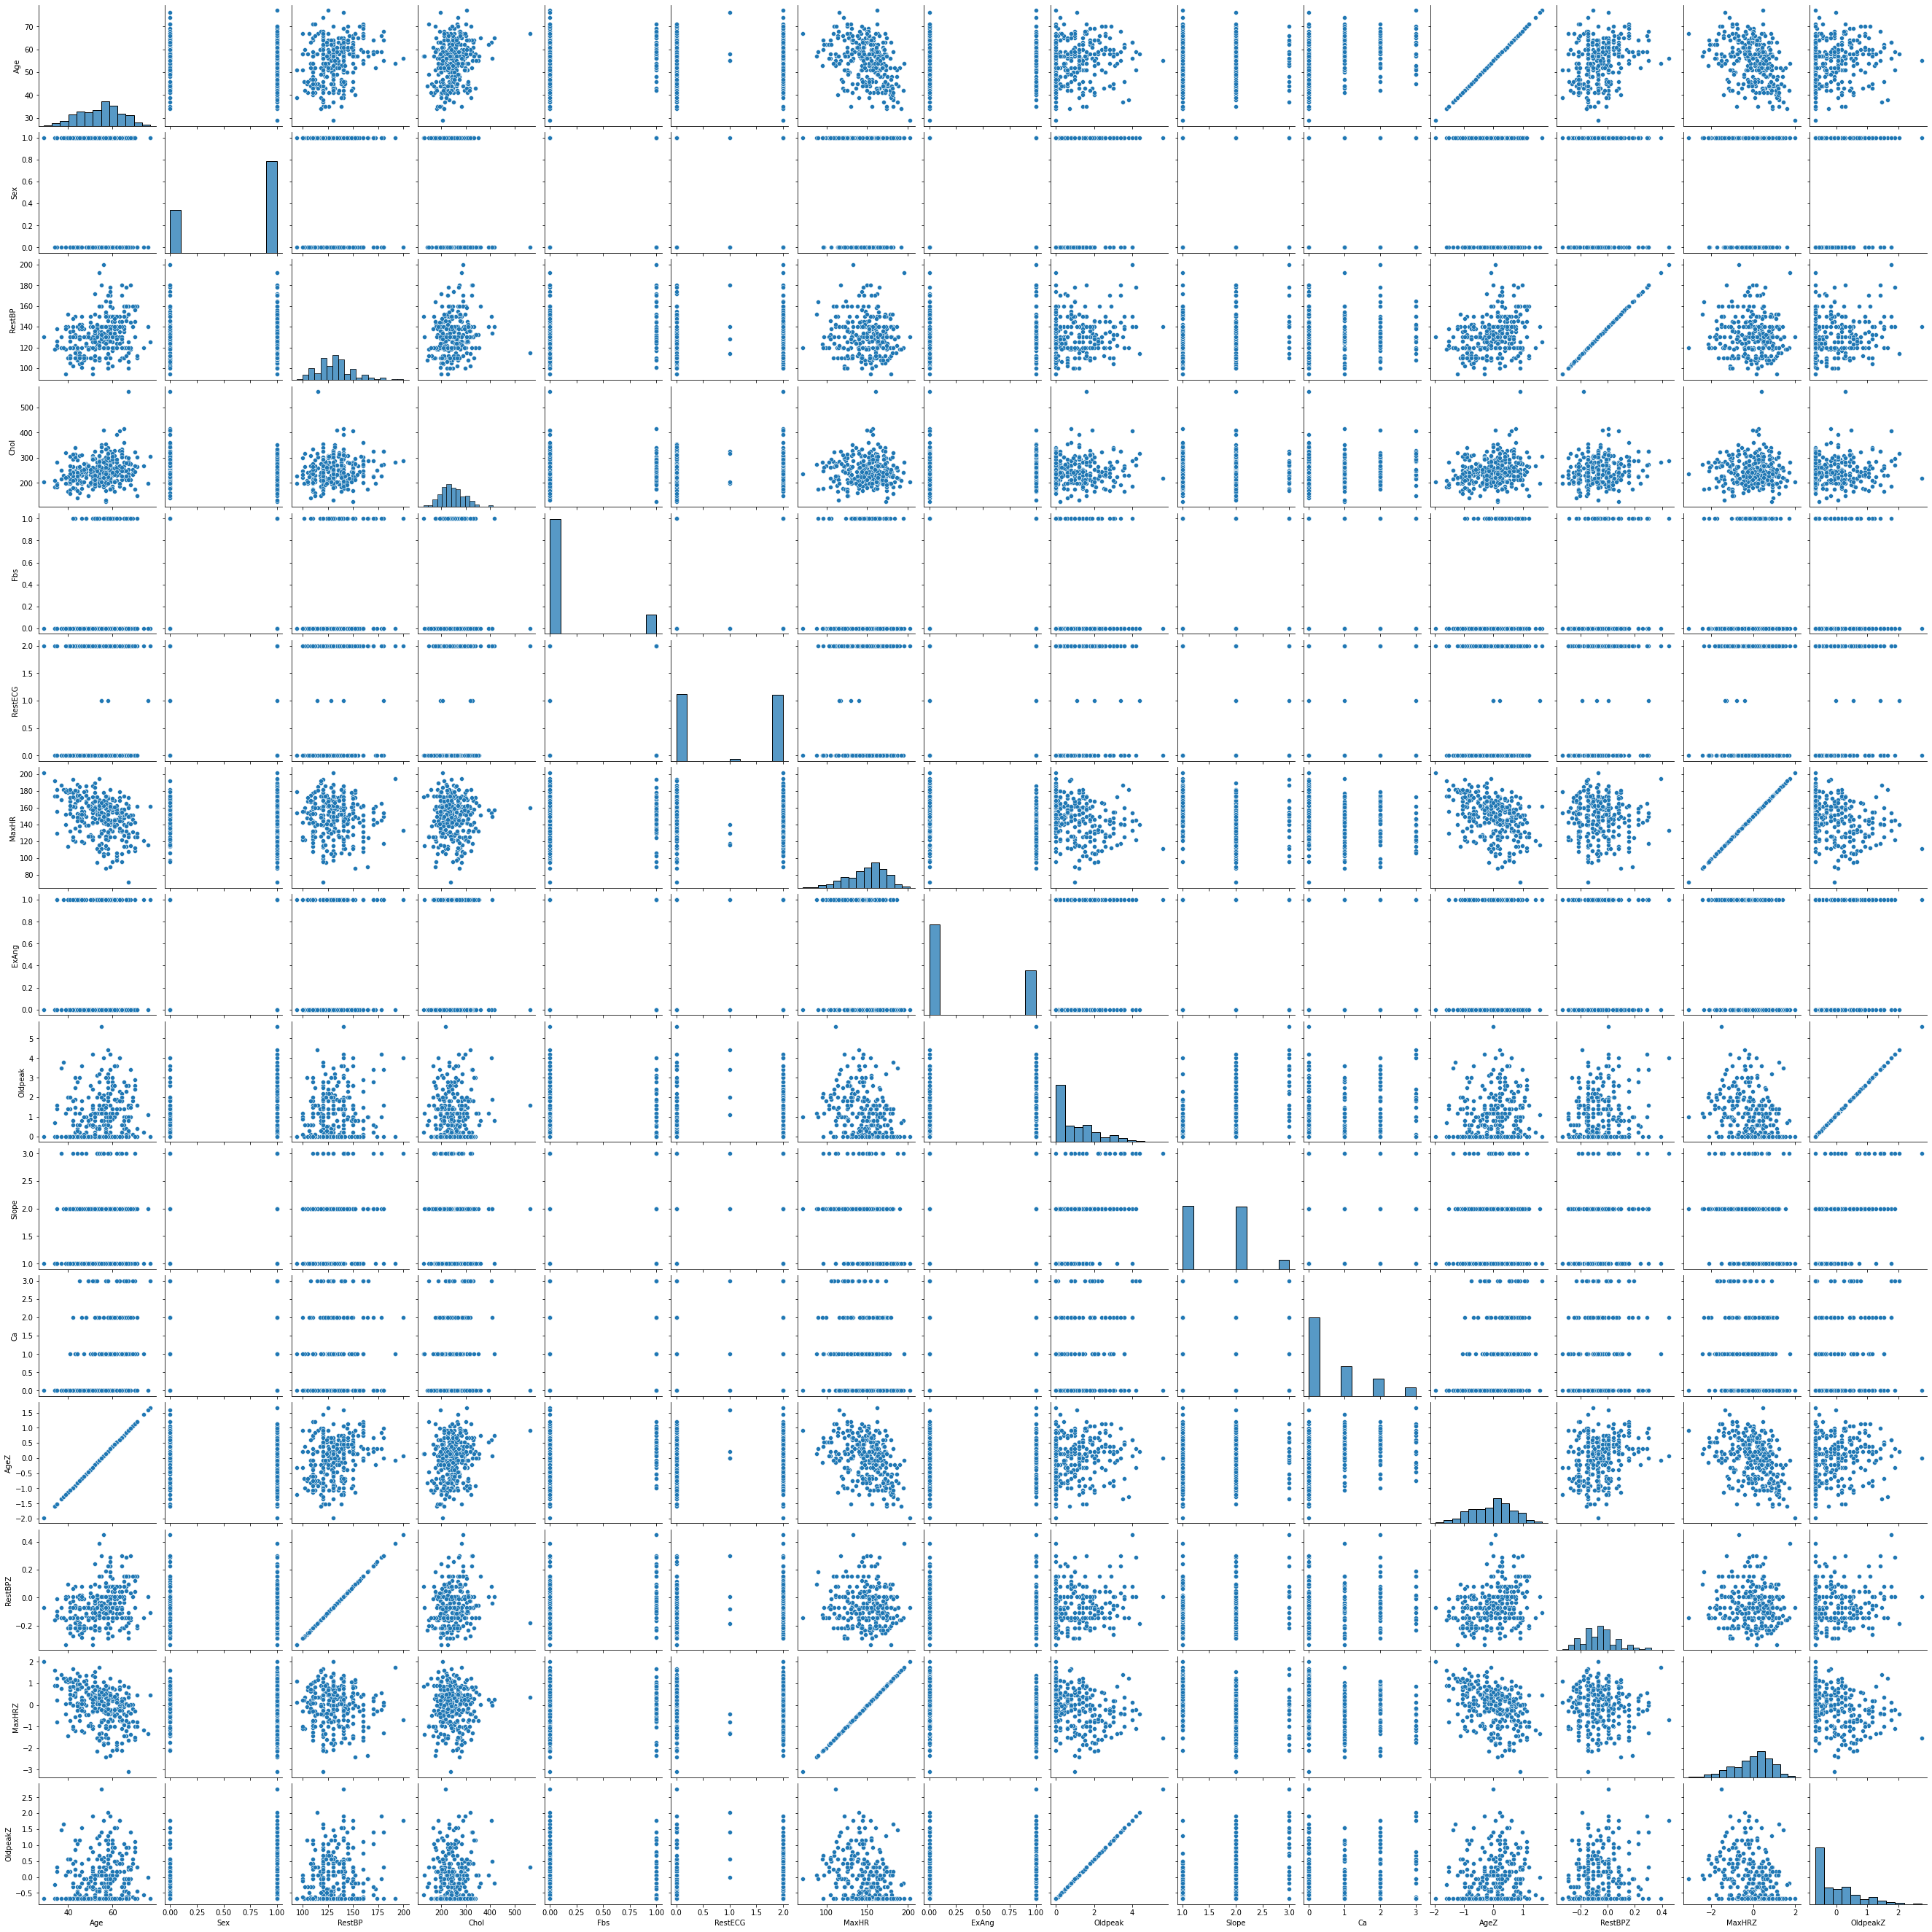

In [17]:
# Make a pairplot of all the variables (columns), excepting the first column.
plt.rcParams['figure.figsize'] = (15, 15)
sns.pairplot(data.drop(columns='Unnamed: 0'))

Let's look at a larger plot of the patient age distribution for the patients in this dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

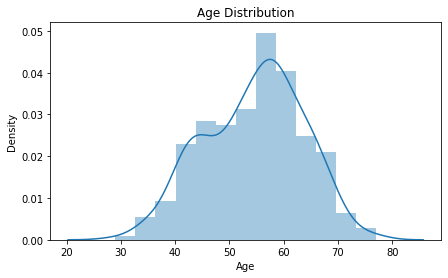

In [18]:
# Plot the patient age distribution.
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Age'])
plt.title('Age Distribution')

Plot the distribution of patient cholesterol levels.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Cholesterol Levels Distribution')

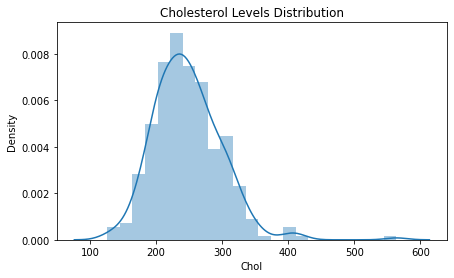

In [19]:
### YOUR CODE HERE ###
plt.rcParams['figure.figsize'] = (7, 4)
sns.distplot(data['Chol'])
plt.title('Cholesterol Levels Distribution')

### f) Data Normalization (6 points)

We have already seen how the z-transform can be used to rescale values. We used this to help eliminate outliers, but such transforms can also be useful prior to applying machine learning algorithms, and often improves the algorithms performance. 

Another common transform is to map all the variable values into the interval $[0,1]$, via the transform:

$$x \to  \frac{x - \min}{\max - \min}$$

Let's create a new column ('NewAge') mapping all ages into the interval $[0,1]$.

In [20]:
# Create a new column, NewAge, to hold the normalized Age variable.
data['NewAge'] = ( data['Age'] - data['Age'].min() ) / ( data['Age'].max() - data['Age'].min() ) ### YOUR CODE HERE ###

# Take a look at the new age column.
data['NewAge']

0      0.708333
1      0.791667
2      0.791667
3      0.166667
4      0.250000
         ...   
297    0.583333
298    0.333333
299    0.812500
300    0.583333
301    0.583333
Name: NewAge, Length: 295, dtype: float64

In [21]:
# We don't need this column, so we delete it. (It was just to show you how to do this.)
data = data.drop(columns=['NewAge'])

Map the minimum to 0 and maximum to 1 (in other words, normalize the column) for the RestBP, Chol, and MaxHR columns. Don't create new columns, just replace the existing ones with the transformed data.

In [22]:
### YOUR CODE HERE ###
data['RestBP'] = ( data['RestBP'] - data['RestBP'].min() ) / ( data['RestBP'].max() - data['RestBP'].min() )
data['Chol'] = ( data['Chol'] - data['Chol'].min() ) / ( data['Chol'].max() - data['Chol'].min() )
data['MaxHR'] = ( data['MaxHR'] - data['MaxHR'].min() ) / ( data['MaxHR'].max() - data['MaxHR'].min() )

# Leave this for your last line.
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AgeZ,RestBPZ,MaxHRZ,OldpeakZ
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,151.294915,54.532203,0.681356,0.355069,0.277920,0.145763,0.996610,0.599896,0.328814,1.036271,1.596610,0.671186,-0.038109,-0.057457,-0.035090,-0.041870
std,87.248284,9.066167,0.466742,0.167295,0.118538,0.353468,0.994879,0.175669,0.470580,1.130351,0.614442,0.931507,0.684896,0.131460,0.893767,0.694772
min,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.966917,-0.336469,-3.087231,-0.678816
25%,75.500000,48.000000,0.000000,0.245283,0.195205,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000,-0.531579,-0.143727,-0.679274,-0.678816
50%,151.000000,56.000000,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.800000,2.000000,0.000000,0.072774,-0.069595,0.097486,-0.187095
75%,226.500000,61.000000,1.000000,0.433962,0.343607,0.000000,2.000000,0.725191,1.000000,1.600000,2.000000,1.000000,0.450495,0.004537,0.602380,0.304626
max,302.000000,77.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.600000,3.000000,3.000000,1.659201,0.449328,2.000549,2.763231


### g) Converting Categorical Data to Numeric Values (3 points)

It is frequently useful to convert categorical (non-numeric) values to numeric ones. The last variable in the data frame, AHD, has categorical values 'No' if the patient has no heart disease, and 'Yes' if they do. Convert these values to 0 for 'No' and 1 for 'Yes'.

In [23]:
### YOUR CODE HERE ###
data['AHD'] = [0 if item == "No" else 1 for item in data['AHD'] ]
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD,AgeZ,RestBPZ,MaxHRZ,OldpeakZ
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,151.294915,54.532203,0.681356,0.355069,0.277920,0.145763,0.996610,0.599896,0.328814,1.036271,1.596610,0.671186,0.461017,-0.038109,-0.057457,-0.035090,-0.041870
std,87.248284,9.066167,0.466742,0.167295,0.118538,0.353468,0.994879,0.175669,0.470580,1.130351,0.614442,0.931507,0.499325,0.684896,0.131460,0.893767,0.694772
min,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.966917,-0.336469,-3.087231,-0.678816
25%,75.500000,48.000000,0.000000,0.245283,0.195205,0.000000,0.000000,0.473282,0.000000,0.000000,1.000000,0.000000,0.000000,-0.531579,-0.143727,-0.679274,-0.678816
50%,151.000000,56.000000,1.000000,0.339623,0.267123,0.000000,1.000000,0.625954,0.000000,0.800000,2.000000,0.000000,0.000000,0.072774,-0.069595,0.097486,-0.187095
75%,226.500000,61.000000,1.000000,0.433962,0.343607,0.000000,2.000000,0.725191,1.000000,1.600000,2.000000,1.000000,1.000000,0.450495,0.004537,0.602380,0.304626
max,302.000000,77.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.600000,3.000000,3.000000,1.000000,1.659201,0.449328,2.000549,2.763231


### h) One-Hot-Encoding (10 points)

One-hot-encoding is another often used way of converting categorical data to numeric. For example, instead of the categories 'cold', 'warm', 'hot', we form a seperate column for each of these attributes, so that what was represented as 'cold' is now $[1,0,0]$ and what was 'hot' is now $[0,0,1]$.  There is a built in command for doing this in the sklearn package.

Similar to what you have learned from the class exercise of lecture 2, add new columns for one-hot-encoding of 'Thal' column. Use 'Thal' as the prefix. Then drop the original column.

In [24]:
# Concatentate new one-hot encodings with the original dataframe.
### YOUR CODE HERE ###
data = pd.concat([data,pd.get_dummies(data['Thal'], prefix='Thal')],axis=1)
# Now drop the original 'Thal' column (you don't need it anymore)
data = data.drop(columns=["Thal"])
### YOUR CODE HERE ###

data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,...,Slope,Ca,AHD,AgeZ,RestBPZ,MaxHRZ,OldpeakZ,Thal_fixed,Thal_normal,Thal_reversable
0,1,63,1,typical,0.481132,0.244292,1,2,0.603053,0,...,3,0.0,0,0.601583,0.041603,-0.019028,0.734882,1,0,0
1,2,67,1,asymptomatic,0.622642,0.365297,0,2,0.282443,1,...,2,3.0,1,0.903759,0.152801,-1.650225,0.243161,0,1,0
2,3,67,1,asymptomatic,0.245283,0.235160,0,2,0.442748,1,...,2,2.0,1,0.903759,-0.143727,-0.834626,0.919277,0,0,1
3,4,37,1,nonanginal,0.339623,0.283105,0,0,0.885496,0,...,3,0.0,0,-1.362564,-0.069595,1.417979,1.472464,0,1,0
4,5,41,0,nontypical,0.339623,0.178082,0,2,0.770992,0,...,1,0.0,0,-1.060388,-0.069595,0.835408,0.181696,0,1,0


Create a one-hot-encoding for the ChestPain column, just as we did above for the Thal column, deleting the original column as before.

In [25]:
### YOUR CODE HERE ###
data = pd.concat([data,pd.get_dummies(data['ChestPain'], prefix='ChestPain')],axis=1)
data = data.drop(columns=["ChestPain"])

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,RestBPZ,MaxHRZ,OldpeakZ,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,...,0.041603,-0.019028,0.734882,1,0,0,0,0,0,1
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,...,0.152801,-1.650225,0.243161,0,1,0,1,0,0,0
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,...,-0.143727,-0.834626,0.919277,0,0,1,1,0,0,0
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,...,-0.069595,1.417979,1.472464,0,1,0,0,1,0,0
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,...,-0.069595,0.835408,0.181696,0,1,0,0,0,1,0


### i) Feature Engineering (7 points)

Feature engineering is central to much of machine learning. Traditionally such features needed to be hand crafted, which is as much an art as it is engineering. One of the huge advantages of neural networks over traditional machine learning techniques is that neural networks can learn optimal features.

Create a new column (feature) called AgeC, which will be the product of the patient's age and the patient's cholesterol level. 

In [26]:
### YOUR CODE HERE ###
data['AgeC'] = data['Age'] * data['Chol']

# Leave this for your last line.
data.head()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,MaxHRZ,OldpeakZ,Thal_fixed,Thal_normal,Thal_reversable,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,AgeC
0,1,63,1,0.481132,0.244292,1,2,0.603053,0,2.3,...,-0.019028,0.734882,1,0,0,0,0,0,1,15.390411
1,2,67,1,0.622642,0.365297,0,2,0.282443,1,1.5,...,-1.650225,0.243161,0,1,0,1,0,0,0,24.474886
2,3,67,1,0.245283,0.235160,0,2,0.442748,1,2.6,...,-0.834626,0.919277,0,0,1,1,0,0,0,15.755708
3,4,37,1,0.339623,0.283105,0,0,0.885496,0,3.5,...,1.417979,1.472464,0,1,0,0,1,0,0,10.474886
4,5,41,0,0.339623,0.178082,0,2,0.770992,0,1.4,...,0.835408,0.181696,0,1,0,0,0,1,0,7.301370


###  j) Balanced or Unbalanced Classes (8 points)

For this dataset, one variable that we might like to predict is the presence of heart disease, the AHD column, using all the other columns. Some datasets are highly imbalanced.  Suppose that 95% of a set of subjects were healthy, with only 5% having heart disease. A machine learning model can attain 95% accuracy by simply ALWAYS predicting no heart disease. It sounds like a fairly accurate model, but it would miss predicting any heart disease! 

There are techniques for dealing with this, but first we have to ascertain if our data is unbalanced. Use the code cell below to see if the data is imbalanced or not and describe your observations in the next text cell.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f16407f70>]],
      dtype=object)

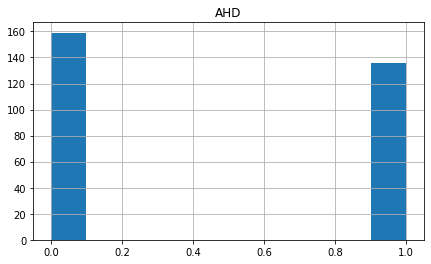

In [27]:
### YOUR CODE HERE ###]
data.hist(column = ['AHD'])

[YOUR ANSWER HERE]
The data is slightly imbalanced as the number of healthy people is more than the number of people with heart disease.

### k) Outline potential solutions to banalnce the data in the next cell, and implement one of those techniques in the code cell that follows. By plotting the distribution or in some other way, indicate how your technique helped create a more balanced dataset. (12 points) 

[YOUR ANSWER HERE]
Delete rows with healthy patients until the number of healthy people is the same as the number of people having heart disease.

Or find more people with heart disease to balance the number of health people and the number of people with heart disease. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f12126520>]],
      dtype=object)

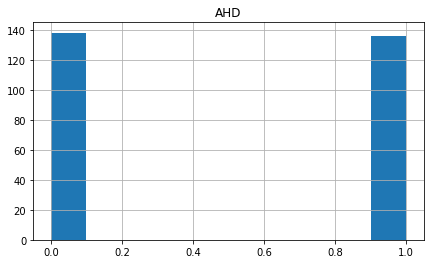

In [28]:
### YOUR CODE HERE ###
import random

healthy_people = data [data['AHD'] == 0 ].index
disease_people = data [data['AHD'] == 1 ].index
indices_to_be_delete = []
for i in range( len(healthy_people) - len(disease_people) ):
  random_index = random.choice (healthy_people)
  if random_index not in indices_to_be_delete:
    indices_to_be_delete.append(random_index)

data.drop(indices_to_be_delete, inplace=True)

# for i in range(healthy_people - disease_people):
data.hist(column = ['AHD'])

